In [47]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
file_path = 'C:\\Users\\Dell\\Downloads\\Garstec_AS09_chiara.hdf5'




In [48]:
with h5py.File(file_path, 'r') as f:
    
    Teff = f['grid/tracks/track00001/Teff'][:]     # Effective Temperature array
    LPhot = f['grid/tracks/track00001/LPhot'][:]   # Photospheric Luminosity array

#LPhot = LPhot * 3.828 * 10**26  # Converting into watts
print("Teff:", Teff[:5])  # Print the first few values
print("LPhot:", LPhot[:5])




Teff: [6616.085448 6615.816533 6615.652662 6615.28651  6614.479369]
LPhot: [9.4944635  9.49526224 9.49569518 9.49661575 9.49869864]


C:\Users\Dell\AppData\Local\Temp\ipykernel_17028\279653088.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Teff, LPhot, cmap='inferno', s=1)


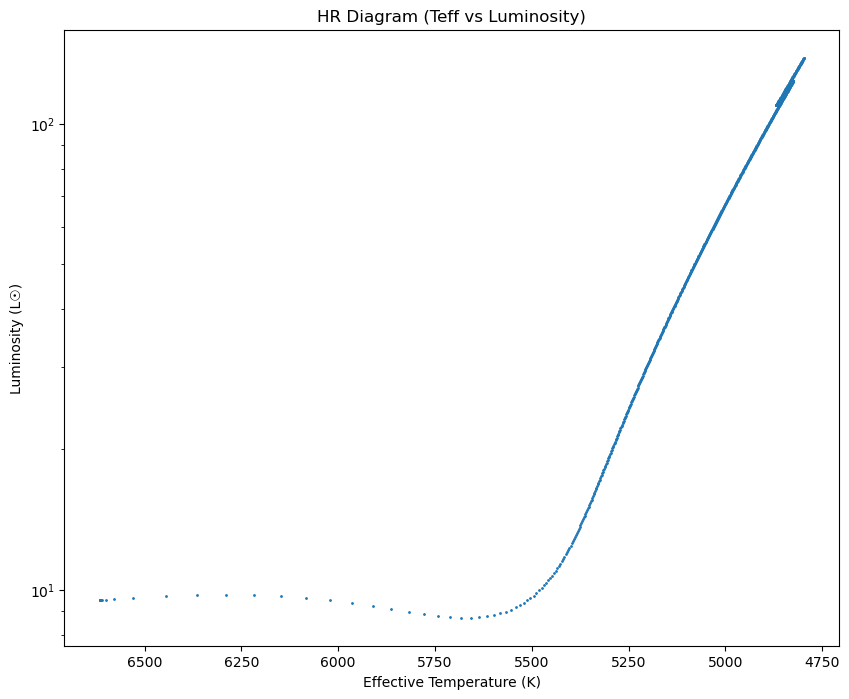

In [49]:
plt.figure(figsize=(10, 8))
plt.scatter(Teff, LPhot, cmap='inferno', s=1)
#plt.colorbar(label="Log Luminosity")
plt.xlabel("Effective Temperature (K)")
plt.ylabel("Luminosity (L☉)")
plt.yscale('log')
plt.gca().invert_xaxis()  # Invert x-axis for HR diagram convention
plt.title("HR Diagram (Teff vs Luminosity)")
plt.savefig('C:\\Users\\Dell\\Documents\\Year 4 project\\track00001.png')
plt.show()


In [ ]:
all_Teff = []
all_LPhot = []

# Open the HDF5 file and iterate over each track this time 
with h5py.File(file_path, 'r') as f:
    for i in range(1, 10):  
        track_number = f"{i:05d}" 
        print(track_number)
        path_temp = f"grid/tracks/track{track_number}/Teff"
        path_lum = f"grid/tracks/track{track_number}/LPhot"
        Teff = f[path_temp][:]
        LPhot = f[path_lum][:]
        all_Teff.append(Teff)  
        all_LPhot.append(LPhot)

#print(all_Teff, all_LPhot)







    
    
   
         

   






00001
00002
00003
00004
00005
00006
00007
00008
00009
0010


KeyError: 'Unable to open object (component not found)'

In [ ]:
# Now plot all data on the same graph

#for Teff, LPhot in zip(all_Teff, all_LPhot):
    #plt.plot(Teff, LPhot, linestyle='-', marker='o', markersize=2, label='Track')

[plt.plot(Teff, LPhot, linestyle='-', color='blue', markersize=0.5) for Teff, LPhot in zip(all_Teff, all_LPhot)]

plt.xlabel("Effective Temperature (K)")
plt.ylabel("Luminosity (L☉)")
plt.yscale('log')
plt.gca().invert_xaxis()  # Invert x-axis for HR diagram convention
plt.title("HR Diagram for All Tracks")
plt.legend()
plt.show()